In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Six students fail the attention check.


final = pd.read_csv('final_new.csv') # TODO: Change to final_updated after getting the new feedback.
final.head()

,Unnamed: 0,Username,group,Persona,ind_1,ind_2,pre_metric,post_metric,pre_quiz,post_quiz,...,3d,e1,e2,e3,e4,e5,e7,e8,e9,e10
0,0,amfang@andrew.cmu.edu,11,Fairness Advocate,Model_2,Model_4,Maximizing Accuracy,Increasing Accuracy;Decreasing disparity betwe...,0.433962,0.8750,...,7.0,7.0,3.0,7.0,7.0,2.0,3.0,2.0,6.0,7.0
1,1,jdiei@andrew.cmu.edu,11,Defendent,Model_5,Model_7,"Minimizing False Positive Rate,Maximizing Accu...",Decreasing False Positive Rate;Increasing Accu...,0.820755,1.0000,...,6.0,6.0,3.0,5.0,5.0,3.0,6.0,6.0,4.0,7.0
2,2,ysato@andrew.cmu.edu,10,Community Member,Model_8,Model_2,"Minimizing disparity (of FPRs\, FNRs\, accurac...",Increasing True Positive Rate;Decreasing False...,0.547170,1.0000,...,6.0,7.0,3.0,5.0,6.0,4.0,7.0,7.0,4.0,7.0
3,3,ashashki@andrew.cmu.edu,9,Judge,Model_3,Model_7,Maximizing True Positive Rate,Decreasing False Positive Rate;Increasing Accu...,0.716981,0.8750,...,7.0,6.0,3.0,6.0,6.0,4.0,7.0,6.0,7.0,7.0
4,4,cheukyil@andrew.cmu.edu,8,Fairness Advocate,Model_4,Model_4,"Minimizing disparity (of FPRs\, FNRs\, accurac...",Increasing True Positive Rate;Increasing True ...,0.622642,0.8125,...,6.0,5.0,3.0,5.0,5.0,4.0,7.0,5.0,6.0,6.0


In [29]:
final[final['3a'].isna()]['Username']

5      xinrany@andrew.cmu.edu
27    jpaniagu@andrew.cmu.edu
36    rdparikh@andrew.cmu.edu
40    mpeswani@andrew.cmu.edu
45    chuqiaos@andrew.cmu.edu
Name: Username, dtype: object

In [34]:
final.columns

Index(['Unnamed: 0', 'Username', 'group', 'Persona', 'ind_1', 'ind_2',
       'pre_metric', 'post_metric', 'pre_quiz', 'post_quiz', '3a', '3b', '3c',
       '3d', 'e1', 'e2', 'e3', 'e4', 'e5', 'e7', 'e8', 'e9', 'e10'],
      dtype='object')

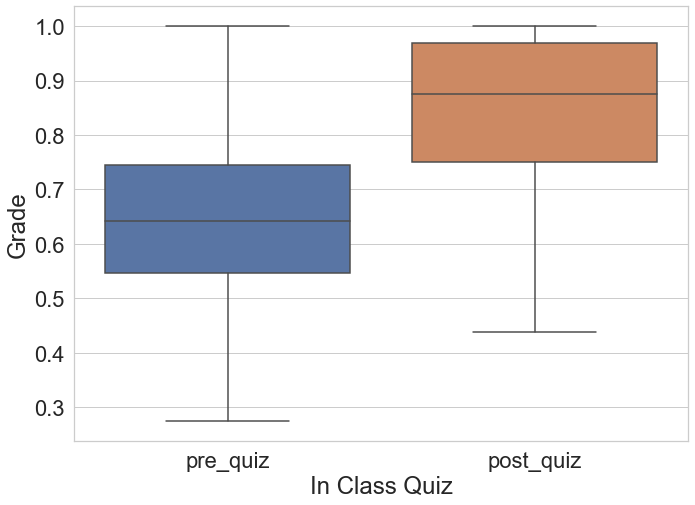

In [49]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=2)
sns.set_style('whitegrid')
df = final[['pre_quiz', 'post_quiz']]
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df))
#ax = sns.swarmplot(x="variable", y="value", data=pd.melt(df))
#fig.set_axis_labels('In Class Quiz', 'Grade')
ax.set(xlabel='In Class Quiz', ylabel='Grade')
fig = ax.get_figure()
fig.savefig("quiz_overall.png")
plt.show()

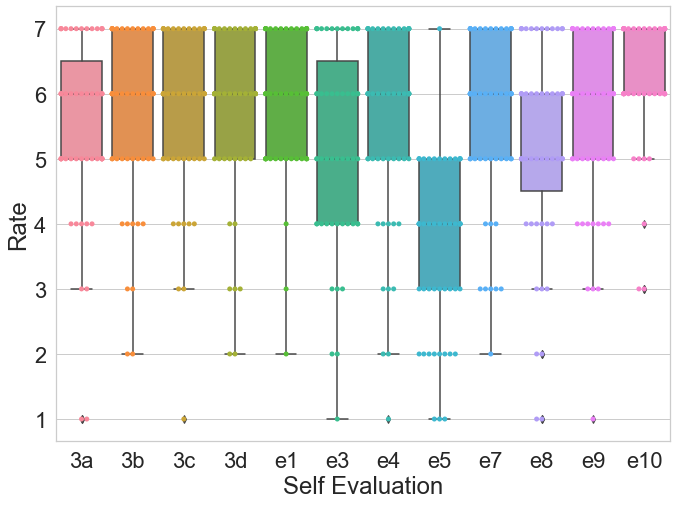

In [64]:
# Calculateing 

evaluation = final[['3a', '3b', '3c','3d', 'e1', 'e3','e4', 'e5', 'e7', 'e8', 'e9', 'e10']]
sns.set(rc={'figure.figsize':(11,8)}, font_scale=2)
sns.set_style('whitegrid')
sns.color_palette("colorblind")

#
ax = sns.swarmplot(x="variable", y="value", data=pd.melt(evaluation))
ax = sns.boxplot(x="variable", y="value", data=pd.melt(evaluation))
#fig.set_axis_labels('In Class Quiz', 'Grade')
ax.set(xlabel='Self Evaluation', ylabel='Rate')
fig = ax.get_figure()
fig.savefig("evaluation.png")
plt.show()

<font size=3> 
    3a: perspective of the **judges**
    3b: perspective of the **defendants**
    3c: perspective of the **community members**
    3d: perspective of the **fairness advocates**
    e1:
    e3:
    e4:
    e5:
    e6:
    e7:
    e8:
    e9:
    e10:

In [52]:
# Descriptive Statistic for different questions.
eval_stat = evaluation.describe()[:3]
eval_stat

,3a,3b,3c,3d,e1,e3,e4,e5,e7,e8,e9,e10
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,5.431373,5.647059,5.686275,5.764706,5.941176,5.196078,5.470588,3.666667,5.588235,5.215686,5.588235,6.294118
std,1.417814,1.339008,1.288258,1.335488,1.120924,1.536484,1.514634,1.306395,1.344269,1.591398,1.402519,0.985781


/Users/wesley/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


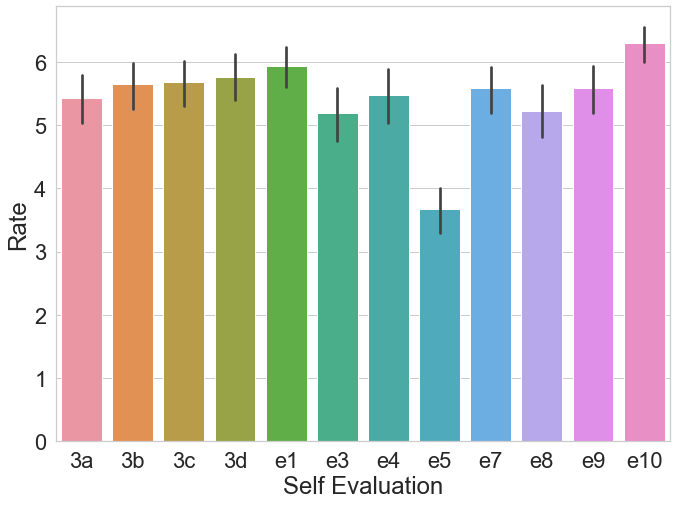

In [53]:
sns.color_palette("muted")
ax = sns.barplot(x="variable", y="value", data=pd.melt(evaluation))
#fig.set_axis_labels('In Class Quiz', 'Grade')
ax.set(xlabel='Self Evaluation', ylabel='Rate')
fig = ax.get_figure()
fig.savefig("eval_bar.png")
plt.show()

In [61]:
# Map key to multiple value to dataframe column.
# A: free +    no checklist
# B: free +    checklist
# C: persona + no checklist
# D: persona + checklist

con1, con2, con3, con4 = ['1', '2', '3'], ['4', '5', '6'], ['7', '8', '9', '10'], ['11', '12', '13', '15']
d1 = dict.fromkeys(con1, 'A')
d2 = dict.fromkeys(con2, 'B')
d3 = dict.fromkeys(con3, 'C')
d4 = dict.fromkeys(con4, 'D')
d = {**d1, **d2, **d3, **d4}

final['cond'] = final['group'].map(d)
final.head()

,Unnamed: 0,Username,group,Persona,ind_1,ind_2,pre_metric,post_metric,pre_quiz,post_quiz,...,e1,e2,e3,e4,e5,e7,e8,e9,e10,cond
0,0,amfang@andrew.cmu.edu,11,Fairness Advocate,Model_2,Model_4,Maximizing Accuracy,Increasing Accuracy;Decreasing disparity betwe...,0.433962,0.8750,...,7.0,3.0,7.0,7.0,2.0,3.0,2.0,6.0,7.0,D
1,1,jdiei@andrew.cmu.edu,11,Defendent,Model_5,Model_7,"Minimizing False Positive Rate,Maximizing Accu...",Decreasing False Positive Rate;Increasing Accu...,0.820755,1.0000,...,6.0,3.0,5.0,5.0,3.0,6.0,6.0,4.0,7.0,D
2,2,ysato@andrew.cmu.edu,10,Community Member,Model_8,Model_2,"Minimizing disparity (of FPRs\, FNRs\, accurac...",Increasing True Positive Rate;Decreasing False...,0.547170,1.0000,...,7.0,3.0,5.0,6.0,4.0,7.0,7.0,4.0,7.0,C
3,3,ashashki@andrew.cmu.edu,9,Judge,Model_3,Model_7,Maximizing True Positive Rate,Decreasing False Positive Rate;Increasing Accu...,0.716981,0.8750,...,6.0,3.0,6.0,6.0,4.0,7.0,6.0,7.0,7.0,C
4,4,cheukyil@andrew.cmu.edu,8,Fairness Advocate,Model_4,Model_4,"Minimizing disparity (of FPRs\, FNRs\, accurac...",Increasing True Positive Rate;Increasing True ...,0.622642,0.8125,...,5.0,3.0,5.0,5.0,4.0,7.0,5.0,6.0,6.0,C


In [77]:
final.columns

Index(['Unnamed: 0', 'Username', 'group', 'Persona', 'ind_1', 'ind_2',
       'pre_metric', 'post_metric', 'pre_quiz', 'post_quiz', '3a', '3b', '3c',
       '3d', 'e1', 'e2', 'e3', 'e4', 'e5', 'e7', 'e8', 'e9', 'e10', 'cond'],
      dtype='object')

In [68]:
# Creating sub dataset to put into cross comparison dataset.

df_stakeholder = final[['cond', '3a', '3b', '3c','3d']] # Single out related columns
stakeholder = pd.melt(df_stakeholder, id_vars=['cond'], value_vars=['3a', '3b', '3c','3d'])
#stakeholder['cond'] = stakeholder['variable'].map(d)

df_feedback = final[['cond','e1', 'e3','e4', 'e5', 'e7', 'e8', 'e9', 'e10']]
feedback = pd.melt(df_feedback, id_vars=['cond'], value_vars=['e1', 'e3','e4', 'e5', 'e7', 'e8', 'e9', 'e10'])
#feedback['cond'] = feedback['variable'].map(d)

In [ ]:
# Quiz data
df_quiz = final[['cond', 'pre_quiz', 'post_quiz']]
quiz = pd.melt(df_quiz, id_vars=['cond'], value_vars=['pre_quiz', 'post_quiz'])

In [70]:
stakeholder.head()

,cond,variable,value
0,D,3a,7.0
1,D,3a,6.0
2,C,3a,6.0
3,C,3a,7.0
4,C,3a,5.0


In [75]:
def seperate_condition(df, x, y, image):
    
    # Args:
    # df -> melted dataframe
    # x, y -> xaxis, yaxis
    # image -> image name + .png
    
    sns.set_palette("muted")
    ax = sns.barplot(x="variable", y="value", hue='cond', 
                 data=df, hue_order=['A', 'B', 'C', 'D'])
    
    ax.set(xlabel=x, ylabel=y)
    fig = ax.get_figure()
    fig.savefig(image + ".png")
    plt.show();

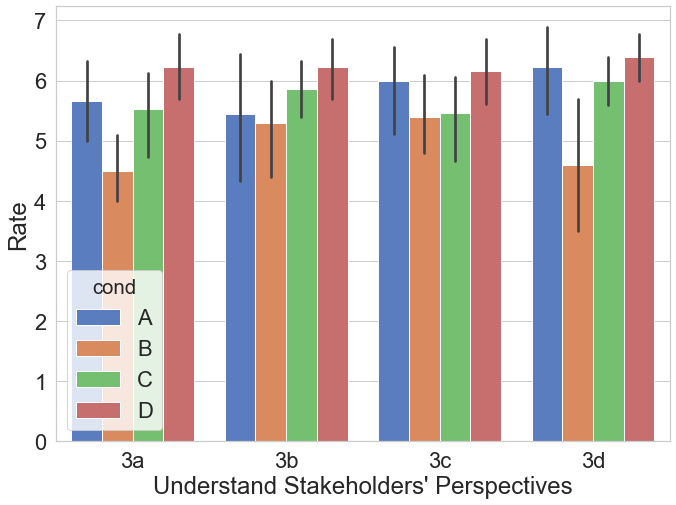

In [76]:
# A: free +    no checklist
# B: free +    checklist
# C: persona + no checklist
# D: persona + checklist
# For paper: Put the explaination in the captions.
seperate_condition(stakeholder, "Understand Stakeholders' Perspectives", "Rate", "stakeholders_seperate")

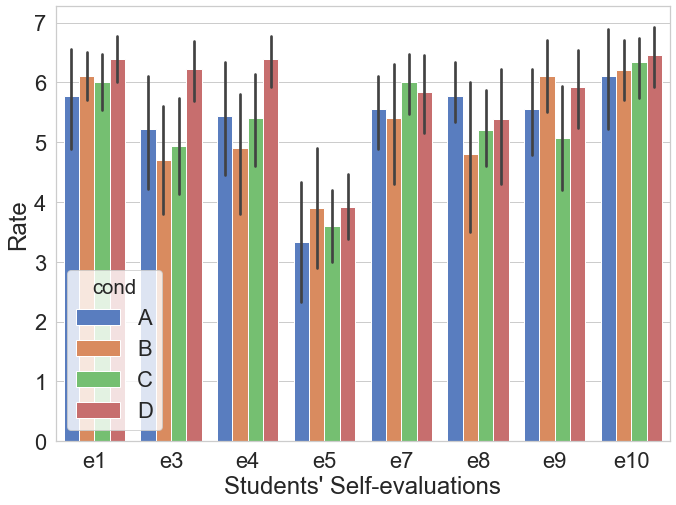

In [79]:
# A: free
# B: checklist
# C: persona
# D: persona + checklist

# e1: The activity helps me understand trade-offs in designing consequential applications in Machine Learning
# e3: I became familiar with the model card quickly.
# e4: The model card is easy to interpret.

# e5: I trust algorithms to make consequential decisions
# e6: TODO: looking at the open ended questions.

# e7: The activity is engaging compared to traditional pedagogical methods like lectures or tutorial
# e8: I would recommend my friends to try out the activity
# e9: The final model our group selected sufficiently captured my values and opinions.
# e10: All of us in the team had a voice in the discussion.
seperate_condition(feedback, "Students' Self-evaluations", "Rate", "evaluation_seperate")